# Main Dashboard of  experiments in post silicon for WL affinity (ICX)

In [1]:
%matplotlib inline

import os
from pca.analytics import *
from clustering.distortion import *
from clustering.clustering import *
from clustering.cluster_score import *

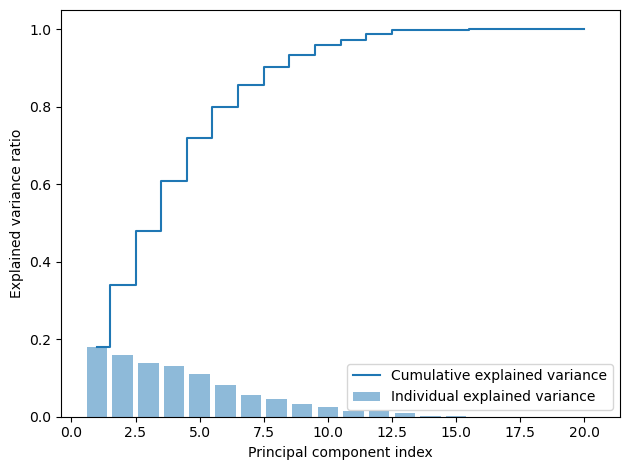

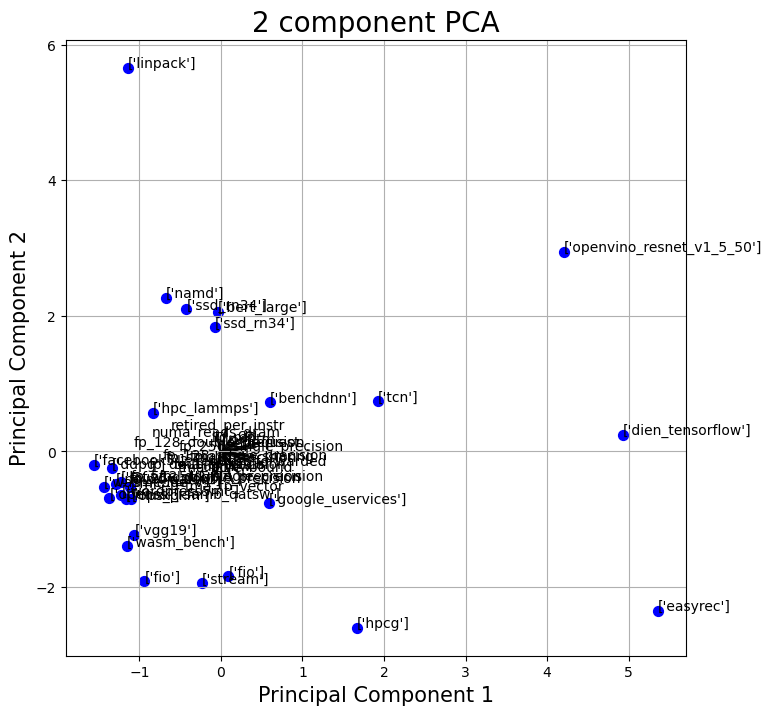

In [2]:
%matplotlib inline

filename = 'tests/wl-affinity/results_icx_norm.csv'
pca_df = None

if os.path.exists(filename):
    df = pd.read_csv(filename)

    features = list(df.columns)[1:]
    test_column = list(df.columns)[0]
    
    pca_df = get_PCA(df, features, test_column)
else:
    print("Filename error")

# Plot characteristics of the worklaods

<AxesSubplot:ylabel='test_name'>

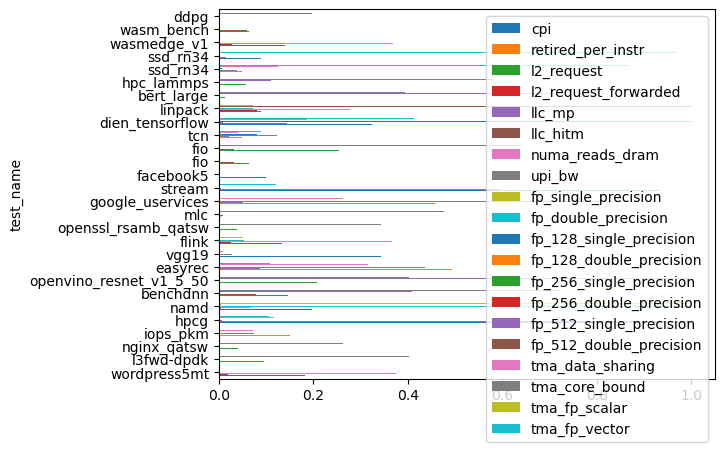

In [3]:
df.plot.barh(x="test_name")

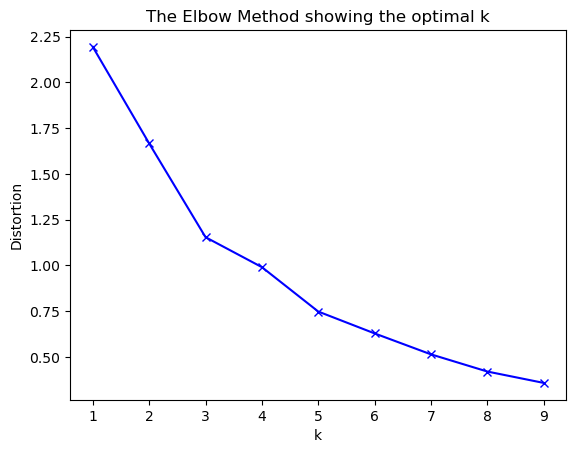

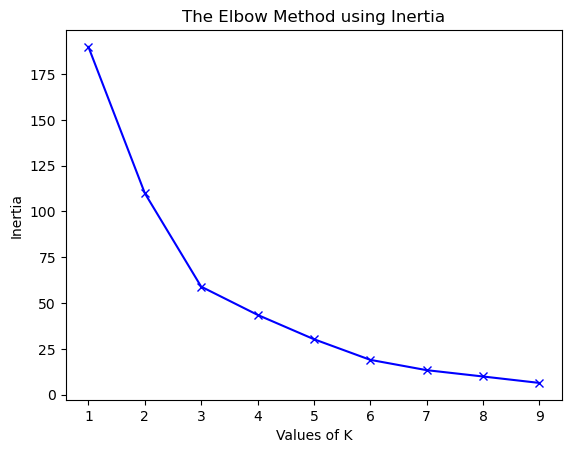

5


In [4]:
if os.path.exists("pca.csv"):    
    clusters = calculate_elbow(pd.read_csv("pca.csv"))


In [5]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 5


## Clasification based on optimal number of clusters

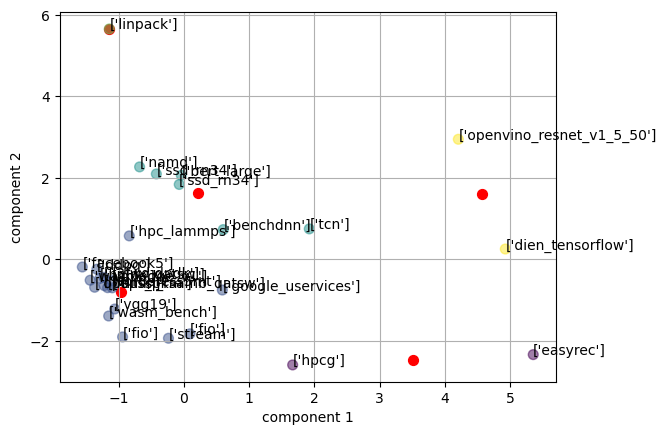

   PRED                test_name
0     0                     hpcg
0     0                  easyrec
1     1             wordpress5mt
1     1               l3fwd-dpdk
1     1              nginx_qatsw
1     1                 iops_pkm
1     1                    vgg19
1     1                    flink
1     1      openssl_rsamb_qatsw
1     1                      mlc
1     1         google_uservices
1     1                   stream
1     1                facebook5
1     1                      fio
1     1                      fio
1     1               hpc_lammps
1     1              wasmedge_v1
1     1               wasm_bench
1     1                     ddpg
2     2                     namd
2     2                 benchdnn
2     2                      tcn
2     2               bert_large
2     2                 ssd_rn34
2     2                 ssd_rn34
3     3                  linpack
4     4  openvino_resnet_v1_5_50
4     4          dien_tensorflow


In [6]:
df_result,kmeans = kmean_cluster("pca.csv",clusters)
print(df_result)

# Get the test cases closer to centroid

In [7]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
df = pca_df.iloc[closest]
df

,Unnamed: 0,principal component 1,principal component 2,test_name
4,4,1.667720,-2.599021,hpcg
10,10,-1.096750,-0.703313,flink
23,23,-0.070430,1.836338,ssd_rn34
20,20,-1.142678,5.659031,linpack
19,19,4.926816,0.249335,dien_tensorflow


,test_name,cpi,retired_per_instr,l2_request,l2_request_forwarded,llc_mp,llc_hitm,numa_reads_dram,upi_bw,fp_single_precision,...,fp_128_single_precision,fp_128_double_precision,fp_256_single_precision,fp_256_double_precision,fp_512_single_precision,fp_512_double_precision,tma_data_sharing,tma_core_bound,tma_fp_scalar,tma_fp_vector
4,hpcg,1.000000,0.842927,0.397086,0.201399,1.000000,0.003308,0.000405,0.006467,2.772550e-06,...,3.868300e-08,6.603540e-04,0.000016,0.0,0.000000,1.252900e-01,0.117062,0.151872,0.011781,0.106850
10,flink,0.133670,0.274926,0.050809,0.025280,0.034124,0.014134,0.365625,0.013104,7.476540e-04,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,0.119655,0.190845,0.050607,0.000000
19,dien_tensorflow,0.324449,0.042385,1.000000,0.077346,0.144226,0.000818,0.002544,0.008015,7.029677e-02,...,1.000000e+00,0.000000e+00,0.994134,0.0,0.298776,0.000000e+00,0.185745,0.468268,0.030633,0.413044
20,linpack,0.089124,0.003868,0.000795,0.080222,0.044632,0.000389,0.278221,1.000000,5.451640e-07,...,4.740900e-08,1.332150e-06,0.000023,1.0,0.000000,1.000000e+00,0.004622,0.460188,0.072747,1.000000
23,ssd_rn34,0.146431,0.049080,0.021352,0.052768,0.038159,0.000381,0.001976,0.002485,4.061270e-02,...,7.495987e-03,1.552810e-06,0.000000,0.0,0.651759,3.353700e-09,0.124573,0.377092,0.025283,0.865698
24,ssd_rn34,0.089723,0.001804,0.002017,0.001247,0.014974,0.000075,0.003183,0.003036,5.711240e-04,...,0.000000e+00,9.235150e-07,0.000000,0.0,0.700520,0.000000e+00,0.001798,0.434581,0.002787,0.967074


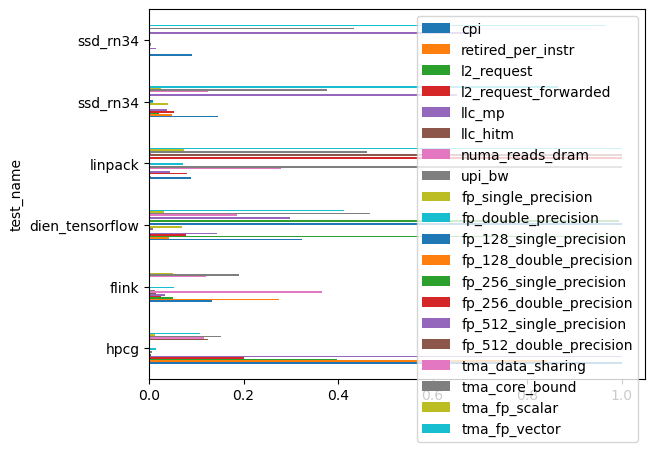

In [11]:
list_tests = df['test_name'].tolist()
df_global = pd.read_csv(filename)
df2 = df_global[df_global['test_name'].isin(list_tests)]
df2.plot.barh(x="test_name")
df2
